In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display

In [3]:
datos_cebollitas = pd.read_csv('partidos_cebollitas.csv')
datos_cebollitas

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
...,...,...,...,...,...,...,...,...,...,...
95,2024-10-27,Data United,Cebollitas FC,4,2,52,48,11,5,Estadio DataCamp
96,2024-11-03,Atlético Python,Data United,4,4,56,44,4,6,Campo Pandas
97,2024-11-10,Atlético Python,Data United,5,0,58,42,4,9,Estadio DataCamp
98,2024-11-17,Cebollitas FC,Atlético Python,2,3,58,42,9,9,Campo Pandas


In [4]:
datos_cebollitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha_partido           100 non-null    object
 1   equipo_local            100 non-null    object
 2   equipo_visitante        100 non-null    object
 3   goles_local             100 non-null    int64 
 4   goles_visitante         100 non-null    int64 
 5   posesion_local (%)      100 non-null    int64 
 6   posesion_visitante (%)  100 non-null    int64 
 7   tiros_arco_local        100 non-null    int64 
 8   tiros_arco_visitante    100 non-null    int64 
 9   estadio                 100 non-null    object
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [5]:
datos_cebollitas.isnull().sum()
datos_cebollitas['goles_local']= datos_cebollitas['goles_local'].fillna(datos_cebollitas['goles_local'].mean())
print("Valores nulos antes de la imputación:")
print(datos_cebollitas.isnull().sum())

Valores nulos antes de la imputación:
fecha_partido             0
equipo_local              0
equipo_visitante          0
goles_local               0
goles_visitante           0
posesion_local (%)        0
posesion_visitante (%)    0
tiros_arco_local          0
tiros_arco_visitante      0
estadio                   0
dtype: int64


In [6]:
datos_preparados = pd.get_dummies(datos_cebollitas, columns=['equipo_local', 'equipo_visitante'])
datos_preparados

,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,True,False,False,False,False,False,True,False,False,False
1,2023-01-08,1,5,60,40,12,3,Estadio ML,False,False,False,True,False,True,False,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,False,True,False,False,False,False,False,True,False,False
3,2023-01-22,2,3,57,43,3,3,Campo Pandas,True,False,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-10-27,4,2,52,48,11,5,Estadio DataCamp,False,False,True,False,False,False,True,False,False,False
96,2024-11-03,4,4,56,44,4,6,Campo Pandas,True,False,False,False,False,False,False,True,False,False
97,2024-11-10,5,0,58,42,4,9,Estadio DataCamp,True,False,False,False,False,False,False,True,False,False
98,2024-11-17,2,3,58,42,9,9,Campo Pandas,False,True,False,False,False,True,False,False,False,False


In [7]:
datos_preparados= datos_preparados.drop_duplicates()
datos_preparados

,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,True,False,False,False,False,False,True,False,False,False
1,2023-01-08,1,5,60,40,12,3,Estadio ML,False,False,False,True,False,True,False,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,False,True,False,False,False,False,False,True,False,False
3,2023-01-22,2,3,57,43,3,3,Campo Pandas,True,False,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-10-27,4,2,52,48,11,5,Estadio DataCamp,False,False,True,False,False,False,True,False,False,False
96,2024-11-03,4,4,56,44,4,6,Campo Pandas,True,False,False,False,False,False,False,True,False,False
97,2024-11-10,5,0,58,42,4,9,Estadio DataCamp,True,False,False,False,False,False,False,True,False,False
98,2024-11-17,2,3,58,42,9,9,Campo Pandas,False,True,False,False,False,True,False,False,False,False


In [8]:
datos_preparados['fecha_partido'] = pd.to_datetime(datos_preparados['fecha_partido'], errors='coerce')
datos_preparados

,fecha_partido,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,equipo_local_Atlético Python,equipo_local_Cebollitas FC,equipo_local_Data United,equipo_local_NumPy City,equipo_local_Real Pandas,equipo_visitante_Atlético Python,equipo_visitante_Cebollitas FC,equipo_visitante_Data United,equipo_visitante_NumPy City,equipo_visitante_Real Pandas
0,2023-01-01,2,0,54,46,12,6,Python Arena,True,False,False,False,False,False,True,False,False,False
1,2023-01-08,1,5,60,40,12,3,Estadio ML,False,False,False,True,False,True,False,False,False,False
2,2023-01-15,1,0,55,45,10,7,Python Arena,False,True,False,False,False,False,False,True,False,False
3,2023-01-22,2,3,57,43,3,3,Campo Pandas,True,False,False,False,False,False,False,True,False,False
4,2023-01-29,5,3,52,48,7,12,Estadio ML,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-10-27,4,2,52,48,11,5,Estadio DataCamp,False,False,True,False,False,False,True,False,False,False
96,2024-11-03,4,4,56,44,4,6,Campo Pandas,True,False,False,False,False,False,False,True,False,False
97,2024-11-10,5,0,58,42,4,9,Estadio DataCamp,True,False,False,False,False,False,False,True,False,False
98,2024-11-17,2,3,58,42,9,9,Campo Pandas,False,True,False,False,False,True,False,False,False,False


In [9]:
df_partidos = pd.read_csv('partidos_cebollitas.csv')
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [10]:
df_partidos.describe()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


##### Promedio de goles cebollitas local y visitante

In [11]:
goles_local_cebo = df_partidos[df_partidos['equipo_local']=='Cebollitas FC']['goles_local'].mean()
goles_visitante_cebo = df_partidos[df_partidos['equipo_visitante']=='Cebollitas FC']['goles_visitante'].mean()

print('Goles promedio cebollitas FC como local:', goles_local_cebo)
print('Goles promedio cebollitas FC como visitante:', goles_visitante_cebo)


Goles promedio cebollitas FC como local: 2.230769230769231
Goles promedio cebollitas FC como visitante: 2.611111111111111


##### Histograma de goles marcados (local y visitante)

<function matplotlib.pyplot.show(close=None, block=None)>

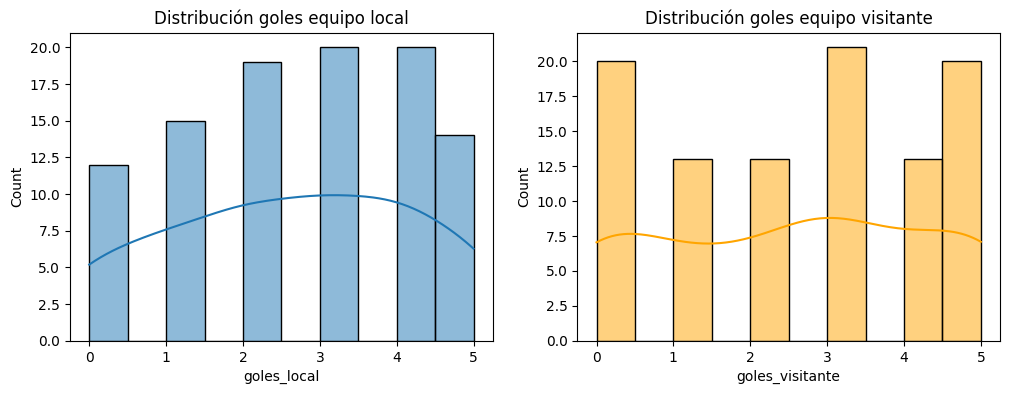

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.histplot(df_partidos['goles_local'], kde=True, ax=ax[0], bins=10)
ax[0].set_title('Distribución goles equipo local')

sns.histplot(df_partidos['goles_visitante'], kde=True, ax=ax[1], bins=10, color='orange')
ax[1].set_title('Distribución goles equipo visitante')

plt.show

#### Box plot equipo local

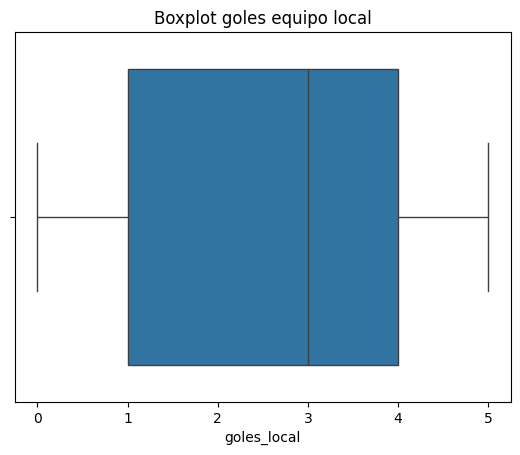

In [13]:
sns.boxplot(x = df_partidos['goles_local'])
plt.title('Boxplot goles equipo local')
plt.show()

#### Scatter plot de posesión vs goles marcados (local)

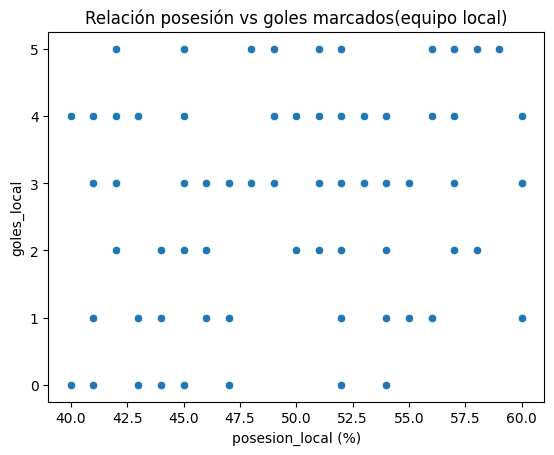

In [14]:
sns.scatterplot(x='posesion_local (%)', y='goles_local', data=df_partidos)
plt.title('Relación posesión vs goles marcados(equipo local)')
plt.show()

#### Mapa de calor para correlación entre variables clave

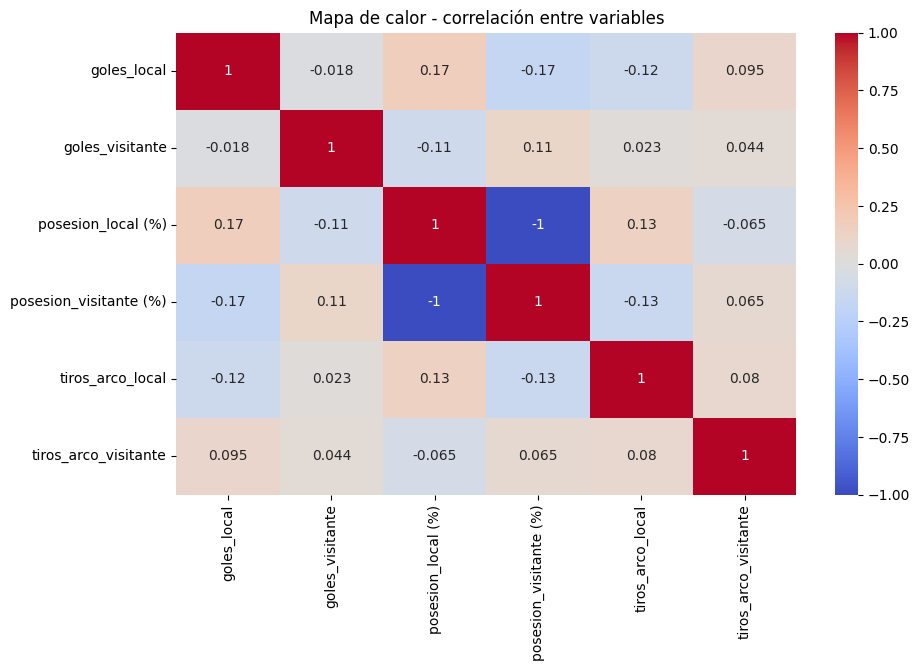

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df_partidos[['goles_local', 'goles_visitante', 'posesion_local (%)', 'posesion_visitante (%)',
                         'tiros_arco_local','tiros_arco_visitante']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor - correlación entre variables')
plt.show()

### Normalización y estandarización

#### Aplicar normalización a tiros al arco (aprox 0-15 tiros)

In [16]:
scaler_norm = MinMaxScaler()

df_partidos['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_local']])
df_partidos['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_visitante']])

df_partidos[['tiros_arco_local', 'tiros_arco_local_norm']]

,tiros_arco_local,tiros_arco_local_norm
0,12,1.000000
1,12,1.000000
2,10,0.777778
3,3,0.000000
4,7,0.444444
...,...,...
95,11,0.888889
96,4,0.111111
97,4,0.111111
98,9,0.666667


#### Aplicar estandarización a la posesion (%)

In [17]:
scaler_std = StandardScaler()

df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])

df_partidos[['posesion_local (%)', 'posesion_local_std']]

,posesion_local (%),posesion_local_std
0,54,0.624415
1,60,1.623479
2,55,0.790926
3,57,1.123947
4,52,0.291394
...,...,...
95,52,0.291394
96,56,0.957436
97,58,1.290457
98,58,1.290457


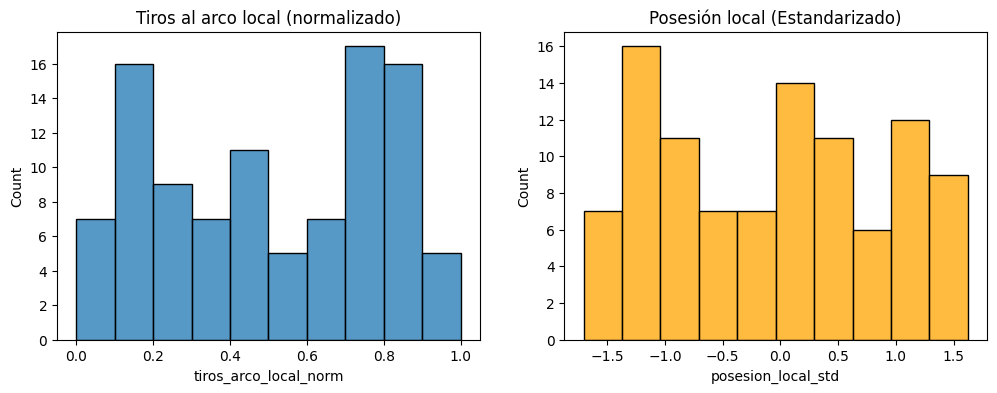

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

#visualizar tiros al arco (Normalización)
sns.histplot(df_partidos['tiros_arco_local_norm'], bins=10, ax=ax[0])
ax[0].set_title('Tiros al arco local (normalizado)')

#Visualizar posesión local (Estandarización)
sns.histplot(df_partidos['posesion_local_std'], bins=10, ax=ax[1], color='orange')
ax[1].set_title('Posesión local (Estandarizado)')

plt.show()

### Feature Engineering

#### Nueva característica_ diferencia de goles (local-visitante)

In [19]:
df_partidos['diferencia_goles']= df_partidos['goles_local'] - df_partidos['goles_visitante']

df_partidos[['goles_local', 'goles_visitante', 'diferencia_goles']]

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,5,-4
2,1,0,1
3,2,3,-1
4,5,3,2
...,...,...,...
95,4,2,2
96,4,4,0
97,5,0,5
98,2,3,-1


#### Nueva característica: ratio tiros al arco por porcentaje de posesión (local)

In [20]:
df_partidos['ratio_tiros_posesion_local']= df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']

df_partidos[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']]

,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615
...,...,...,...
95,11,52,0.211538
96,4,56,0.071429
97,4,58,0.068966
98,9,58,0.155172


#### Histograma diferencia de goles

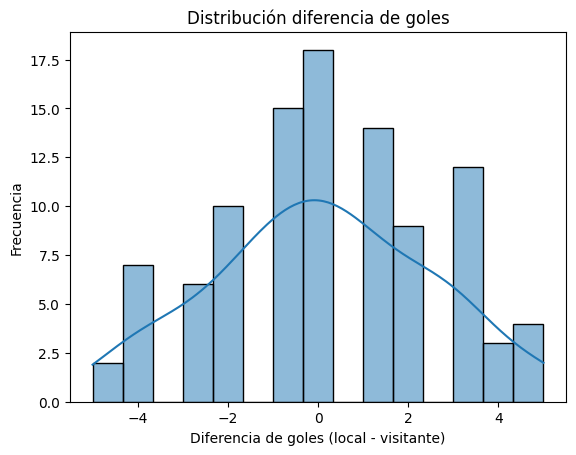

In [21]:
sns.histplot(df_partidos['diferencia_goles'], bins=15, kde=True)
plt.title('Distribución diferencia de goles')
plt.xlabel('Diferencia de goles (local - visitante)')
plt.ylabel('Frecuencia')
plt.show()

#### Análisis de correlaciones

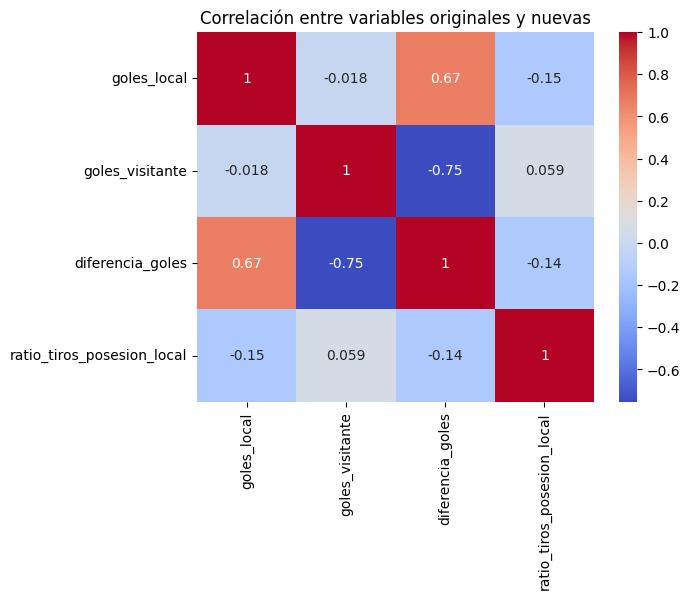

In [22]:
corr_vars = ['goles_local', 'goles_visitante', 'diferencia_goles', 'ratio_tiros_posesion_local']
corr_matrix= df_partidos[corr_vars].corr()

#Mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables originales y nuevas')
plt.show()

#### Variables predictoras y objetivo

In [23]:
X = df_partidos[['posesion_local (%)', 'tiros_arco_local','ratio_tiros_posesion_local']]
y = df_partidos['goles_local']

# Seleccionar las 2 mejores variables
selector = SelectKBest(score_func=f_regression, k=2)
selector.fit(X,y)

#Resultados ordenados por relevancia
scores= selector.scores_
variables = X.columns

resultados = pd.DataFrame({'Variable':variables, 'Score': scores}).sort_values(by='Score', ascending=False)
resultados

,Variable,Score
0,posesion_local (%),2.844159
2,ratio_tiros_posesion_local,2.323320
1,tiros_arco_local,1.372691


In [24]:
#Entrenar árbol de decisión para medir la importancia
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X, y)

#Importancia calculada por el modelo
importancia = modelo_arbol.feature_importances_

resultado_importancia = pd.DataFrame({
    'Variable':variables,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

resultado_importancia

,Variable,Importancia
0,posesion_local (%),0.491563
2,ratio_tiros_posesion_local,0.305755
1,tiros_arco_local,0.202683


C:\Users\xioma\AppData\Local\Temp\ipykernel_21452\4229274837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Variable', data=resultados, ax=ax[0], palette='Blues_r')
C:\Users\xioma\AppData\Local\Temp\ipykernel_21452\4229274837.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=resultado_importancia, ax=ax[1], palette='Greens_r')


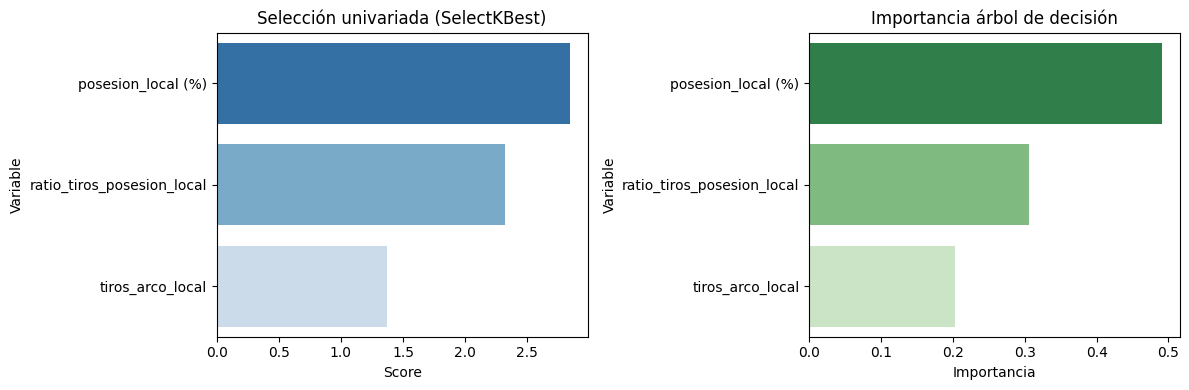

In [25]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

#gráfica selectkbest (análisis univariado)
sns.barplot(x='Score', y='Variable', data=resultados, ax=ax[0], palette='Blues_r')
ax[0].set_title('Selección univariada (SelectKBest)')

# Gráfica importancia (árbol decisión)
sns.barplot(x='Importancia', y='Variable', data=resultado_importancia, ax=ax[1], palette='Greens_r')
ax[1].set_title('Importancia árbol de decisión')

plt.tight_layout()
plt.show()

### Division de datos para entrenamiento

In [26]:
#Slider interactivo para elegir el porcentaje de prueba
slider_test_size = widgets.FloatSlider(
    value=0.2, min=0.1, max=0.5, step=0.05,
    description='% Test Set:', continous_update=False
)
display(slider_test_size)

FloatSlider(value=0.2, description='% Test Set:', max=0.5, min=0.1, step=0.05)

In [27]:
def dividir_datos(test_size):
    X = df_partidos[['posesion_local (%)', 'tiros_arco_local', 'goles_local']]
    y = df_partidos['diferencia_goles']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    print(f"Tamaño conjunto entrenamiento: {len(X_train)} partidos")
    print(f"Tamaño conjunto prueba: {len(X_test)} partidos")

    return X_train, X_test, y_train, y_test

#Uso de widgets interactivos
widgets.interactive(dividir_datos, test_size=slider_test_size)

interactive(children=(FloatSlider(value=0.2, description='% Test Set:', max=0.5, min=0.1, step=0.05), Output()…

In [28]:
#Disivion estandar recomendada (80% entranamiento 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    df_partidos[['posesion_local (%)', 'tiros_arco_local']],
    df_partidos['diferencia_goles'],
    test_size=0.2, random_state=42
    )

print("Conjunto entrenamiento")
display(X_train)

print("\nConjunto prueba")
display(X_test)

Conjunto entrenamiento


,posesion_local (%),tiros_arco_local
55,51,6
88,54,9
26,53,4
42,52,4
69,60,9
...,...,...
60,41,4
71,43,4
14,52,6
92,51,8



Conjunto prueba


,posesion_local (%),tiros_arco_local
83,47,3
53,60,3
70,50,5
45,57,7
44,45,5
39,60,7
22,45,11
80,49,5
10,48,5
0,54,12


### Regresión lineal

In [29]:
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


In [30]:
print(f"Intercepto: {modelo_rl.intercept_}")
print(f"Coeficiente: {modelo_rl.coef_}")

for idx, col_name in enumerate(X_train.columns):
    print(f"Si aumentamos 1 unidad en '{col_name}', la diferencia en goles cambia en promedio {modelo_rl.coef_[idx]:.2f}")

Intercepto: -2.5257192572329763
Coeficiente: [ 0.05596278 -0.05125811]
Si aumentamos 1 unidad en 'posesion_local (%)', la diferencia en goles cambia en promedio 0.06
Si aumentamos 1 unidad en 'tiros_arco_local', la diferencia en goles cambia en promedio -0.05


In [31]:
y_pred = modelo_rl.predict(X_test)

df_resultados = X_test.copy()
df_resultados['Diferencia_Goles_Real'] = y_test
df_resultados['Diferencia_Goles_Predicha'] = y_pred.round(2)

df_resultados

,posesion_local (%),tiros_arco_local,Diferencia_Goles_Real,Diferencia_Goles_Predicha
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


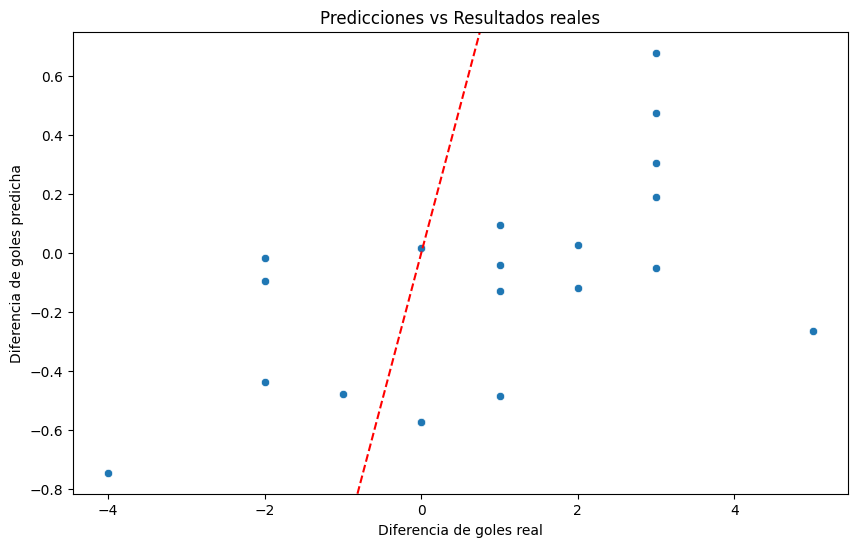

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y= y_pred)
plt.xlabel('Diferencia de goles real')
plt.ylabel('Diferencia de goles predicha')
plt.title('Predicciones vs Resultados reales')
plt.axline((0,0), slope=1, color='red', linestyle='--')
plt.show()

In [33]:
posesion_input = widgets.FloatSlider(min=30, max=70, step=1, description='Posesión (%)')
tiros_input = widgets.IntSlider(min=1, max=15, step=1, description='Tiros al arco')

def predecir_goles(posesion, tiros):
    entrada= pd.DataFrame([[posesion, tiros]], columns=['posesion_local (%)', 'tiros_arco_local'])
    pred = modelo_rl.predict(entrada)[0]
    print(f"Diferencia de goles predicha: {pred:.2f}")

widgets.interactive(predecir_goles, posesion= posesion_input, tiros=tiros_input)

interactive(children=(FloatSlider(value=30.0, description='Posesión (%)', max=70.0, min=30.0, step=1.0), IntSl…

#### Medir la calidad del modelo de regresión líneal

In [34]:
#Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 4.96
Raíz del error cuadrático medio (RMSE): 2.23
Error absoluto medio (MAE): 1.89
Coeficiente de determinación (R²): -0.03


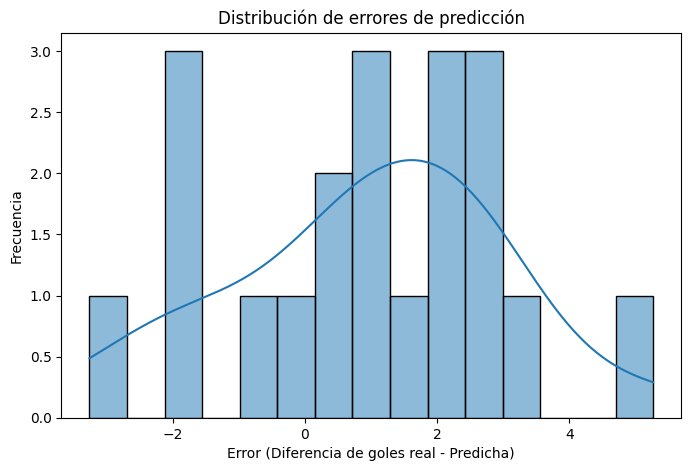

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribución de errores de predicción')
plt.xlabel('Error (Diferencia de goles real - Predicha)')
plt.ylabel('Frecuencia')
plt.show()

#### INTERPRETACIÓN RÁPIDA
+ **MSE/RMSE**: Cuanto más cerca de 0, mejor. Indican cuánto se alejan las predicciones.
+ **MAE**: Error Promedio en goles. Fácil de entender.Un MAE de 0.8 -> error promedio de 0.8 goles
+ **R^2**: Cuánto explica el modelo del comportamiento real. 1 es perfecto, 0 es como adivinar.

In [36]:
def evaluar_predicciones(threshold_mae):
    calidad = "buena" if mae <= threshold_mae else "regular o mala"
    print(f"Tu modelo tiene una MAE de: {mae:.2f}, lo que indica una calidad {calidad} de las predicciones (umbral definido: {threshold_mae}).")

umbral_widget = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1.0, description='Umbral MAE:')
widgets.interactive(evaluar_predicciones, threshold_mae=umbral_widget)

interactive(children=(FloatSlider(value=1.0, description='Umbral MAE:', max=5.0, min=0.1), Output()), _dom_cla…

In [37]:
if r2<0:
    print("El modelo no explica la varianza.Peo que adivinar.")
elif r2 <0.3:
    print("El modelo explica muy poco. Posible underfitting")
else:
    print("el modelo tiene un poder explicativo aceptable.")

El modelo no explica la varianza.Peo que adivinar.


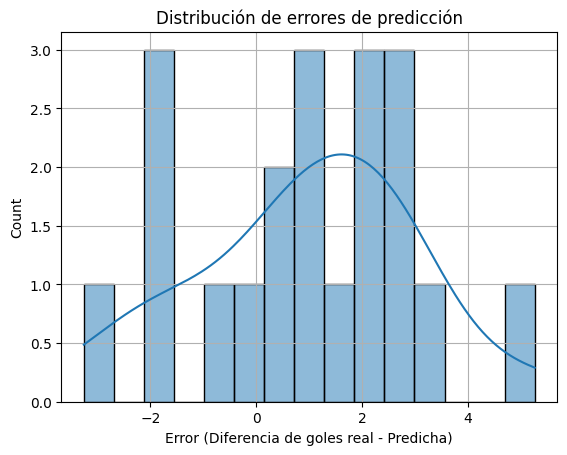

In [38]:
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribución de errores de predicción')
plt.xlabel('Error (Diferencia de goles real - Predicha)')
plt.grid(True)
plt.show()

#### Medir la calidad del arbol de decision

In [39]:
#Entrenar el arbol con el mismo set de datos de entrenamiento que la regresión lineal
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Predicción
y_pred = modelo_arbol.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Importancia de variables
importancia = modelo_arbol.feature_importances_
resultado_importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

resultado_importancia

MSE: 6.96, RMSE: 2.64, MAE: 2.07, R²: -0.44


,Variable,Importancia
0,posesion_local (%),0.637356
1,tiros_arco_local,0.362644


## Clustering

### K-means

In [40]:
df_jugadores = pd.read_csv('jugadores_cebollitas.csv')
df_jugadores

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047
5,6,Dr. Justin Anderson,Mediocampista,33,16,3,3,86.5,40,75.9,1200
6,7,Sandra Shepherd,Portero,35,23,4,2,90.2,2,51.2,2070
7,8,Mark Bowers,Mediocampista,28,14,5,4,81.1,50,79.6,910
8,9,Kenneth Cook,Portero,25,15,2,0,86.8,0,0.0,1035
9,10,Christopher Parks,Portero,26,12,4,10,78.7,7,63.6,1032


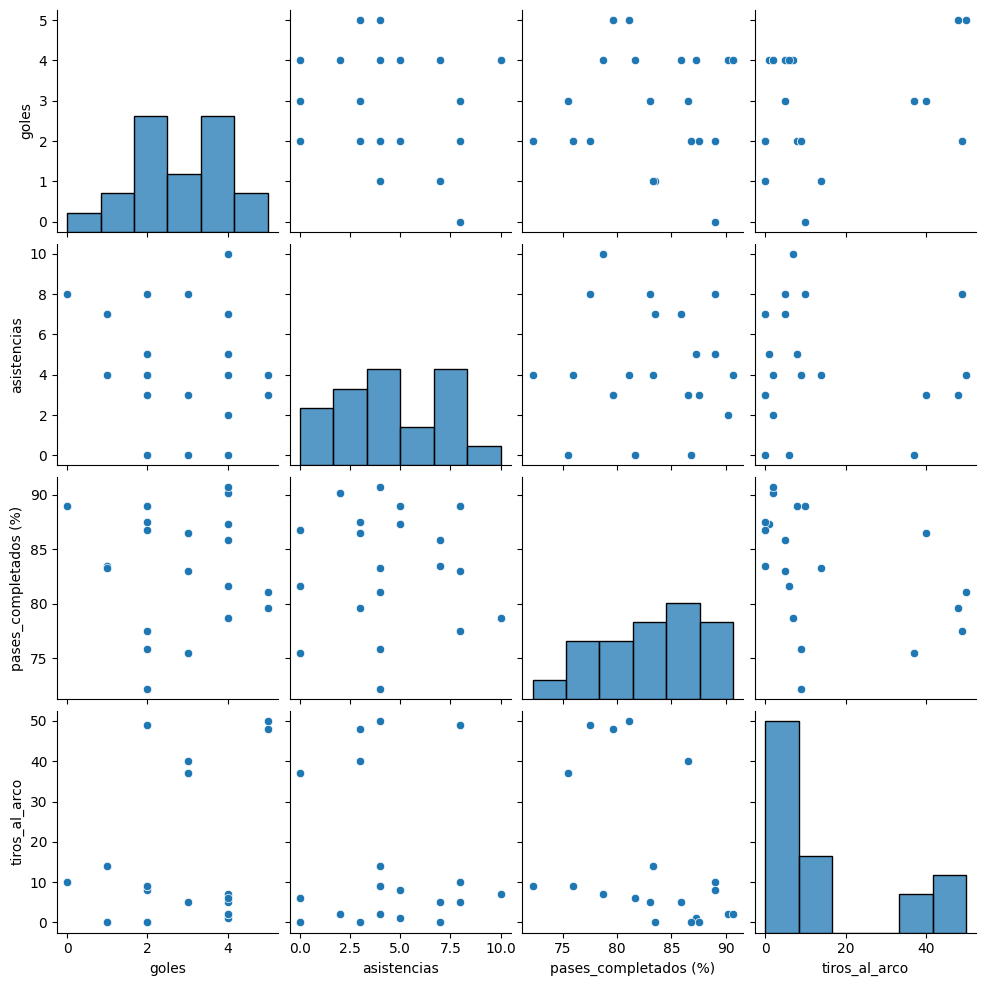

In [42]:
sns.pairplot(df_jugadores[['goles','asistencias','pases_completados (%)','tiros_al_arco']])
plt.show()

In [44]:
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

kmenas = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmenas.fit_predict(X)

df_jugadores

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,1
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,0
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,1
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,1
5,6,Dr. Justin Anderson,Mediocampista,33,16,3,3,86.5,40,75.9,1200,0
6,7,Sandra Shepherd,Portero,35,23,4,2,90.2,2,51.2,2070,1
7,8,Mark Bowers,Mediocampista,28,14,5,4,81.1,50,79.6,910,0
8,9,Kenneth Cook,Portero,25,15,2,0,86.8,0,0.0,1035,1
9,10,Christopher Parks,Portero,26,12,4,10,78.7,7,63.6,1032,2


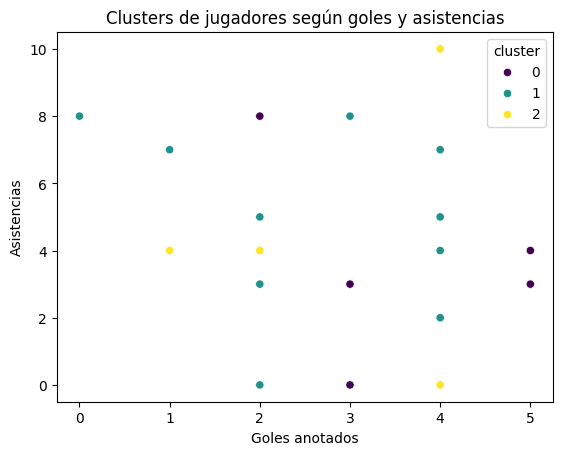

In [45]:
sns.scatterplot(x='goles', y='asistencias', hue='cluster', data=df_jugadores, palette='viridis')
plt.title('Clusters de jugadores según goles y asistencias')
plt.xlabel('Goles anotados')
plt.ylabel('Asistencias')
plt.show()

In [46]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
perfiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(perfiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


In [ ]:
def clustering_interactivo(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_jugadores['cluster_temp'] = kmeans.fit_predict(X)
    
    sns.scatterplot(x='goles', y='asistencias', hue='cluster_temp', data=df_jugadores, palette='viridis')
    plt.title(f'Clusters de jugadores (k={k})')
    plt.xlabel('Goles anotados')
    plt.ylabel('Asistencias')
    plt.show()

widgets.interactive(clustering_interactivo, k=(2,8,1))

interactive(children=(IntSlider(value=5, description='k', max=8, min=2), Output()), _dom_classes=('widget-inte…

#### Interpretación kmeans

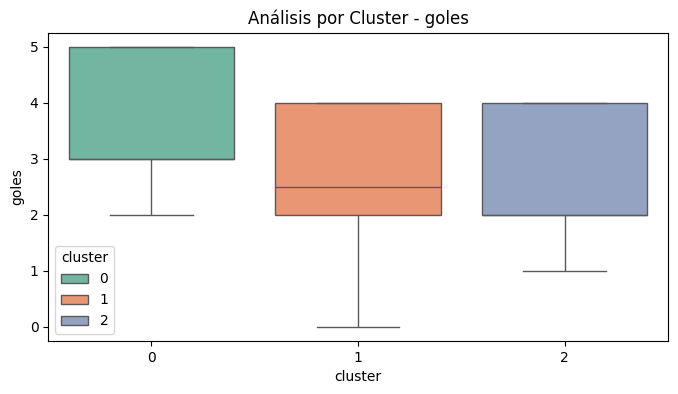

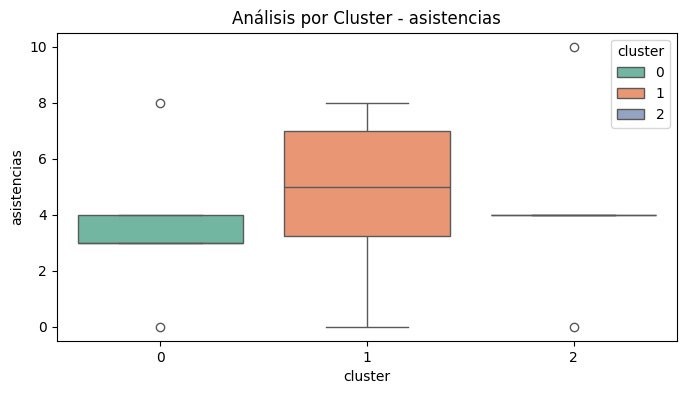

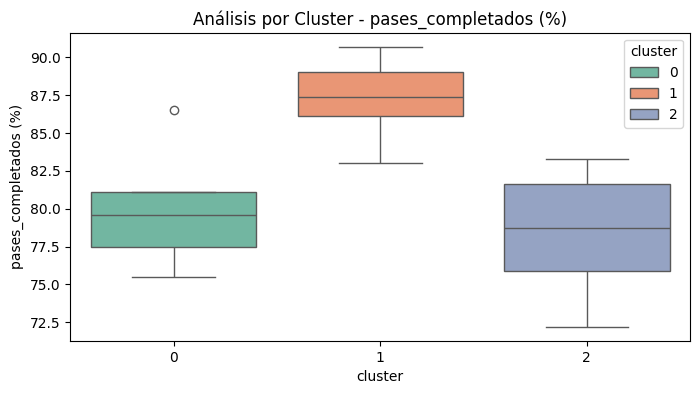

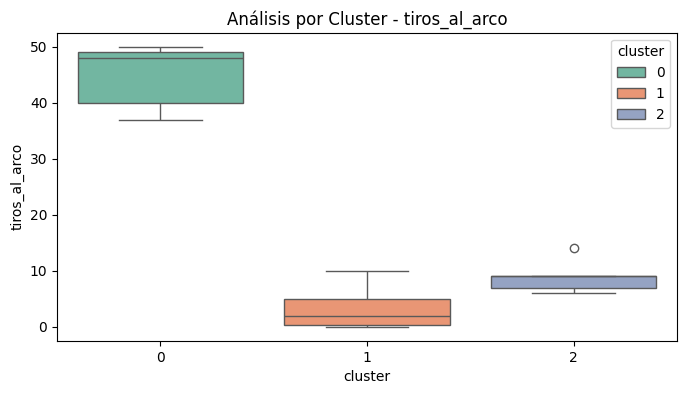

In [50]:
features = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='cluster', y=feature,hue='cluster', data=df_jugadores, palette='Set2')
    plt.title(f'Análisis por Cluster - {feature}')
    plt.show()

In [51]:
# Dropdown interactivo
cluster_selector = widgets.Dropdown(
    options=sorted(df_jugadores['cluster'].unique()),
    description='Cluster:'
)

# Función de despliegue
def mostrar_jugadores(cluster):
    jugadores = df_jugadores[df_jugadores['cluster'] == cluster]
    display(jugadores[['nombre', 'goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])

# Activar widget
widgets.interactive(mostrar_jugadores, cluster=cluster_selector)

interactive(children=(Dropdown(description='Cluster:', options=(np.int32(0), np.int32(1), np.int32(2)), value=…

#### Análisis con PCA

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)

df_jugadores['PC1'] = componentes[:,0]
df_jugadores['PC2'] = componentes[:,1]

<Axes: xlabel='PC1', ylabel='PC2'>

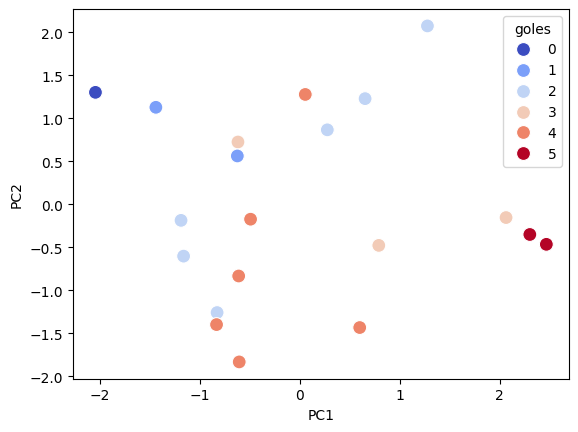

In [56]:
sns.scatterplot(x='PC1', y='PC2', data=df_jugadores, hue='goles', palette='coolwarm', s=100)

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X_scaled)

<Axes: xlabel='PC1', ylabel='PC2'>

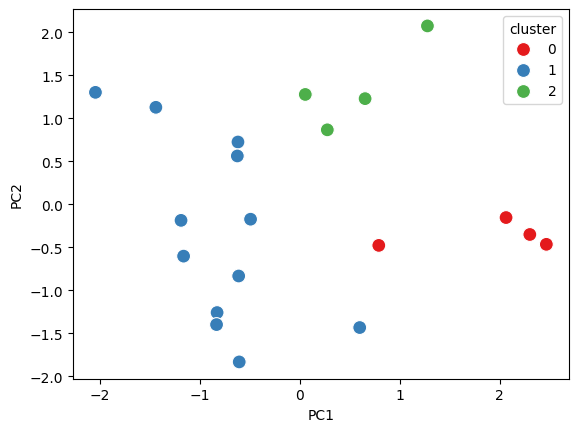

In [58]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set1', data=df_jugadores, s=100)

In [59]:
varianza = pca.explained_variance_ratio_

print(f"Varianza explicada por PC1: {varianza[0]:.2%}")
print(f"Varianza explicada por PC2: {varianza[1]:.2%}")
print(f"Varianza total explicada: {varianza.sum():.2%}")

Varianza explicada por PC1: 38.65%
Varianza explicada por PC2: 28.39%
Varianza total explicada: 67.04%


In [ ]:
def explorar_componentes(eje_x, eje_y):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=eje_x, y=eje_y, hue='cluster', data=df_jugadores, palette='Set2', s=100)
    plt.title(f'Clusters en espacio {eje_x} vs {eje_y}')
    plt.grid(True)
    plt.show()

widgets.interactive(
    explorar_componentes,
    eje_x=['PC1', 'PC2'],
    eje_y=['PC1', 'PC2']
)

interactive(children=(Dropdown(description='eje_x', options=('PC1', 'PC2'), value='PC1'), Dropdown(description…